In [182]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [183]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

y = np.array([[0],[1],[1],[0]])


In [184]:
np.random.seed(25)
input = 2
hidden = 4
output = 1

W1 = np.random.randn(input, hidden)
b1 = np.zeros((1, hidden))

W2 = np.random.randn(hidden, output)
b2 = np.zeros((1, output))

In [185]:
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    yout = sigmoid(z2)

    return z1, a1, z2, yout

In [186]:
def compute_loss(y, yout):
    return np.mean((y - yout)**2)

In [187]:
def backward(X, y, z1, a1, z2, yout, lr=0.1):
    global W1, b1, W2, b2

    error = yout - y
    d_output = error * sigmoid_derivative(yout)

    error_hidden = np.dot(d_output, W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)

    W2 -= lr * np.dot(a1.T, d_output)
    b2 -= lr * np.sum(d_output, axis=0, keepdims=True)

    W1 -= lr * np.dot(X.T, d_hidden)
    b1 -= lr * np.sum(d_hidden, axis=0, keepdims=True)



In [188]:
epochs = 10000
losses = []

for i in range(epochs):
    z1, a1, z2, yout = forward(X)
    loss = compute_loss(y, yout)
    losses.append(loss)

    backward(X, y, z1, a1, z2, yout, lr=0.1)

    if i % 1000 == 0:
      print(f"Epoch for {i}, Loss: {loss}")

Epoch for 0, Loss: 0.2890618470537209
Epoch for 1000, Loss: 0.2305340049820058
Epoch for 2000, Loss: 0.13639638654503913
Epoch for 3000, Loss: 0.04301244659471062
Epoch for 4000, Loss: 0.016483211860895384
Epoch for 5000, Loss: 0.008564992922448564
Epoch for 6000, Loss: 0.005371524570260985
Epoch for 7000, Loss: 0.0037720717684415527
Epoch for 8000, Loss: 0.0028476652421320432
Epoch for 9000, Loss: 0.0022585047309853345


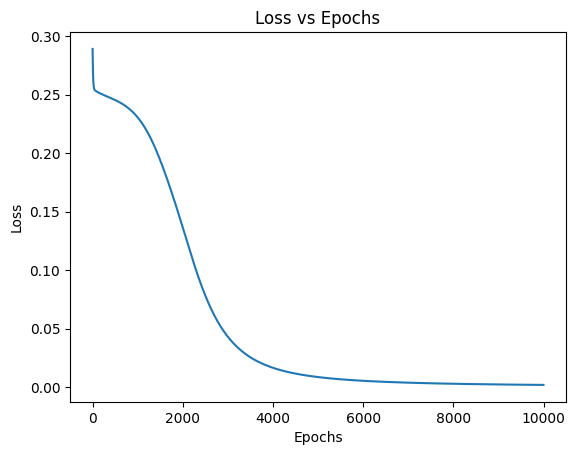

In [189]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

In [190]:
_, _, _, ypred = forward(X)
print("Predictions:")
print(ypred)

Predictions:
[[0.03530121]
 [0.95087796]
 [0.9607964 ]
 [0.04719296]]
